# Practica 5

In [1]:
from deap import creator, tools, base, algorithms
import numpy as np
import random


class Tren:
    def __init__(self, numero_vagones, operacion, matricula):
        self.numero_vagones = numero_vagones
        self.operacion = operacion
        self.matricula = matricula

    def __str__(self):
        return "Número de vagones: " + str(self.numero_vagones) + "\n" + \
        "Muelle de operaciones: " + str(self.operacion) + "\n" + \
                "Matrícula: " + str(self.matricula) + "\n"

    


def producir_lista_trenes_aleatoria(n, min_vagones, max_vagones):
    lista_trenes = []
    for i in range(n):
        numero_vagones = random.randint(min_vagones, max_vagones)
        operacion = random.choice(["gas", "carbón", "contenedores"])
        lista_trenes.append(Tren(numero_vagones, operacion, i))
    return lista_trenes


def crear_cola_de_trenes(lista_de_trenes):
    auxiliar = lista_de_trenes
    random.shuffle(auxiliar)
    return auxiliar


class Cola_de_trenes(list):
    def __init__(self, lista_de_trenes, create = True):
        if create:
            list.extend(self,crear_cola_de_trenes(lista_de_trenes))
        else:
            list.extend(self, lista_de_trenes)

    def __str__(self):
        cadena = ""
        for i in list(self):
            cadena += (str(i) + "\n")
        return cadena

random.seed(2024)

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create("Individual", Cola_de_trenes, fitness=creator.FitnessMin)

In [3]:
toolbox = base.Toolbox()

# Crear individuos
toolbox.register("individual", creator.Individual, producir_lista_trenes_aleatoria(50, 10, 30))


toolbox.register("individual_mate", creator.Individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:

def tiempo_total(indiv):
    sum = 0 
    for tren in indiv:
        sum += tren.numero_vagones

    return sum


def evaluar_cola(individuo):
    
    muelle_gas = 1
    muelle_carbon = 1
    muelle_contenedores = 1
    id_tren = 0

    
    for i in range(tiempo_total(individuo)):
        muelle_gas -= 1
        muelle_carbon -= 1
        muelle_contenedores -= 1
        
        if id_tren >= len(individuo) and muelle_carbon <= 0 and muelle_contenedores <= 0 and muelle_gas <= 0:
            break
        
        for _ in range(3):
            
            if id_tren >= len(individuo):
                break

            if individuo[id_tren].operacion == "carbón" and muelle_carbon <= 0:
                muelle_carbon = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
            if individuo[id_tren].operacion == "contenedores" and muelle_contenedores <= 0:
                muelle_contenedores = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
                
            if individuo[id_tren].operacion == "gas" and muelle_gas <= 0:
                muelle_gas = individuo[id_tren].numero_vagones
                id_tren += 1
                continue

        continue
    return i,


In [5]:
def train_swap(indivuduo, indpb):
    if random.random() < indpb:
        pos1 = random.randint(0, len(indivuduo) - 1)
        pos2 = random.randint(0, len(indivuduo) - 1)
        
        train1 = indivuduo[pos1]
        train2 = indivuduo[pos2]
        indivuduo[pos1] = train2
        indivuduo[pos2] = train1
        
    return indivuduo,

In [6]:
from copy import deepcopy

def trains_mate(indv1, indv2):
    cut = random.randint(0, len(indv1) - 1)
    
    f_half_new_invd1 = indv1[:cut]
    f_half_new_invd2 = indv1[cut:]
    
    l_half_new_invd1 = deepcopy(indv2)
    l_half_new_invd2 = []
    
    for train1 in f_half_new_invd1:
        for train2 in indv2:
            if train1.matricula == train2.matricula:
                for i, t in enumerate(l_half_new_invd1):
                    if train1.matricula == t.matricula:
                        l_half_new_invd1.pop(i)
                        l_half_new_invd2.append(train2)
    
    new_indv1 = f_half_new_invd1 + l_half_new_invd1
    new_indv2 = f_half_new_invd2 + l_half_new_invd2
    
    return toolbox.individual_mate(new_indv1, False), toolbox.individual_mate(new_indv2, False)

In [7]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.03)

In [16]:
ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

In [17]:
poblacion = toolbox.population(n=100)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.5, mutpb=0.2, ngen=75, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	1000  	549.406 	693	423
1  	361   	517.479 	619	423
2  	364   	493.866 	604	417
3  	355   	474.866 	542	412
4  	367   	461.654 	575	403
5  	371   	450.991 	522	398
6  	353   	440.342 	523	398
7  	370   	430.209 	508	398
8  	406   	421.924 	507	393
9  	349   	415.401 	484	393
10 	354   	409.158 	486	393
11 	370   	403.819 	484	384
12 	324   	400.571 	455	390
13 	357   	399.579 	464	388
14 	366   	398.685 	471	388
15 	361   	397.114 	459	381
16 	355   	396.738 	470	381
17 	363   	396.088 	465	381
18 	315   	394.226 	454	381
19 	364   	393.118 	463	381
20 	338   	391.676 	461	381
21 	361   	389.869 	459	380
22 	357   	388.299 	458	380
23 	326   	386.2   	443	380
24 	374   	385.071 	452	380
25 	366   	384.319 	432	380
26 	388   	384.514 	432	380
27 	328   	383.571 	426	380
28 	343   	384.236 	432	380
29 	380   	384.061 	432	380
30 	332   	383.635 	462	380
31 	358   	383.685 	463	380
32 	361   	383.708 	476	380
33 	387   	384.096 	451	380
34 	364   	383.459 	

In [18]:
print(f'El mejor individuo es \n {ranking[0]} con aptitud {ranking[0].fitness}')

El mejor individuo es 
 Número de vagones: 28
Muelle de operaciones: carbón
Matrícula: 1

Número de vagones: 23
Muelle de operaciones: gas
Matrícula: 16

Número de vagones: 29
Muelle de operaciones: contenedores
Matrícula: 38

Número de vagones: 29
Muelle de operaciones: gas
Matrícula: 8

Número de vagones: 24
Muelle de operaciones: contenedores
Matrícula: 13

Número de vagones: 25
Muelle de operaciones: carbón
Matrícula: 6

Número de vagones: 30
Muelle de operaciones: contenedores
Matrícula: 33

Número de vagones: 12
Muelle de operaciones: gas
Matrícula: 45

Número de vagones: 16
Muelle de operaciones: gas
Matrícula: 27

Número de vagones: 17
Muelle de operaciones: carbón
Matrícula: 48

Número de vagones: 24
Muelle de operaciones: gas
Matrícula: 42

Número de vagones: 13
Muelle de operaciones: carbón
Matrícula: 32

Número de vagones: 19
Muelle de operaciones: contenedores
Matrícula: 9

Número de vagones: 23
Muelle de operaciones: contenedores
Matrícula: 31

Número de vagones: 17
Muell

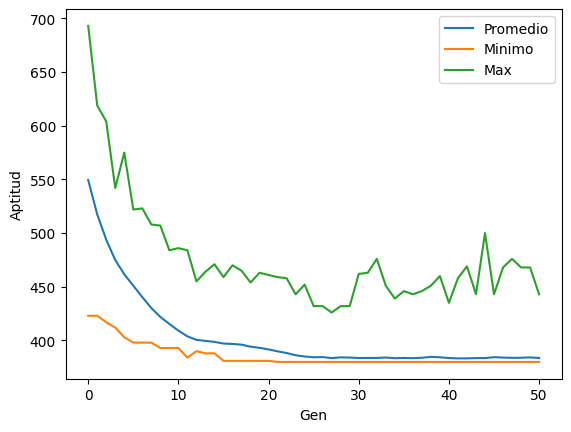

In [19]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()